# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [2]:
#Verify that the data has been imported correctly into pandas dataframes. Use methods like head() and info()
gdp_df = pd.read_csv("GDP.csv")
inflation_monthly_df = pd.read_csv("inflation_monthly.csv")
microsft_historical_data_df = pd.read_csv("microsoft_historical_data.csv")
consumer_price_index_df = pd.read_csv("consumer_price_index.csv")
apple_historical_data_df = pd.read_csv("apple_historical_data.csv")



In [3]:
# Load historical GDP data

In [4]:
gdp_df.head()
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    309 non-null    object 
 1   GDP     309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [5]:
inflation_monthly_df.head()
inflation_monthly_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [6]:
microsft_historical_data_df.head()
microsft_historical_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [7]:
consumer_price_index_df.head()
consumer_price_index_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [8]:
apple_historical_data_df.head()
apple_historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [9]:
missing_data_after = apple_historical_data_df.isnull().sum()
print("Missing data after filling:\n", missing_data_after)

Missing data after filling:
 Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [10]:
# Check for nulls 
apple_historical_data_df.isnull().values.any()


True

In [11]:
microsft_historical_data_df.isnull().values.any()

False

In [12]:
# Forward fill any missing data
apple_historical_data_df.ffill(inplace=True)
microsft_historical_data_df.ffill(inplace=True)

In [13]:
# Check again for nulls after using forward fill
missing_data = apple_historical_data_df.isnull().sum()
print("Missing data before filling:\n", missing_data)


Missing data before filling:
 Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [14]:
def clean_and_standardize_data(df, currency_columns, datetime_columns):
    """
    Cleans and standardizes the given dataframe by:
    - Removing dollar signs ('$') and extra spaces from specified currency columns
    - Converting specified datetime columns to pandas datetime format

    Parameters:
        df (pd.DataFrame): The dataframe to clean
        currency_columns (list): List of column names containing currency values
        datetime_columns (list): List of column names containing datetime values

    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    # Remove dollar signs, extra spaces, and convert to float for currency columns
    for col in currency_columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float safely

    # Convert datetime columns to pandas datetime format
    for col in datetime_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    return df


In [15]:
apple_historical_data_df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [16]:
microsft_historical_data_df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [17]:
# Define columns to clean
currency_cols = ["Close/Last", "Open", "High", "Low"]
datetime_cols = ["Date"] 

# Apply the cleaning function
apple_historical_data_df = clean_and_standardize_data(apple_historical_data_df, currency_cols, datetime_cols)

In [18]:
apple_historical_data_df

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
2512,2014-05-12,21.17,212736019,20.98,21.20,20.98
2513,2014-05-09,20.91,291068564,20.88,20.94,20.73
2514,2014-05-08,21.00,228973884,21.01,21.23,20.94
2515,2014-05-07,21.15,282128727,21.26,21.33,20.99


In [19]:
# Define columns to clean
currency_cols = ["Close/Last", "Open", "High", "Low"]
datetime_cols = ["Date"] 

# Apply the cleaning function
microsoft_historical_data_df= clean_and_standardize_data(microsft_historical_data_df, currency_cols, datetime_cols)

In [20]:
microsft_historical_data_df

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,406.660,17446720,402.28,407.1500,401.8600
1,2024-05-02,397.840,17709360,397.66,399.9300,394.6515
2,2024-05-01,394.940,23562480,392.61,401.7199,390.3100
3,2024-04-30,389.330,28781370,401.49,402.1600,389.1700
4,2024-04-29,402.250,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...,...
2512,2014-05-12,39.970,22761620,39.74,40.0200,39.6500
2513,2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2514,2014-05-08,39.640,32089010,39.34,39.9000,38.9700
2515,2014-05-07,39.425,41731030,39.22,39.5100,38.5100


In [21]:
microsft_historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [22]:
def align_to_month_end(df, datetime_column):
    """
    Adjusts the given datetime column so that all dates fall on the last day of the respective month.

    Parameters:
        df (pd.DataFrame): The dataframe containing the datetime column.
        datetime_column (str): The name of the datetime column to adjust.

    Returns:
        pd.DataFrame: The dataframe with the adjusted datetime column.
    """
    if datetime_column in df.columns:
        df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')  # Ensure datetime format
        df[datetime_column] = df[datetime_column] + MonthEnd(0)  # Align to month-end
    
    return df

In [23]:
microsft_historical_data_df = align_to_month_end(microsft_historical_data_df, "Date")

In [24]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
microsft_historical_data_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-31,406.66,17446720,402.28,407.1500,401.8600
1,2024-05-31,397.84,17709360,397.66,399.9300,394.6515
2,2024-05-31,394.94,23562480,392.61,401.7199,390.3100
3,2024-04-30,389.33,28781370,401.49,402.1600,389.1700
4,2024-04-30,402.25,19582090,405.25,406.3200,399.1900


In [25]:
apple_historical_data_df = align_to_month_end(apple_historical_data_df,"Date")

In [26]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
apple_historical_data_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-31,183.38,163224100,186.65,187.00,182.66
1,2024-05-31,173.03,94214920,172.51,173.42,170.89
2,2024-05-31,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-30,173.50,68169420,173.37,176.03,173.10


In [27]:
inflation_monthly_df = align_to_month_end(inflation_monthly_df, "Date")


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [28]:
def downsample_to_quarterly(df, date_column):
    """
    Downsamples a DataFrame from monthly to quarterly by computing the mean for each quarter.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with monthly data.
        date_column (str): The name of the column containing the dates.
        
    Returns:
        pd.DataFrame: A new DataFrame downsampled to quarterly frequency.
    """
    # Ensure the date column is in datetime format and set it as the index
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df = df.set_index(date_column)
    
    # Downsample to quarterly frequency using the mean for each quarter
    df_quarterly = df.resample('QE').mean()
    
    # Reset index so that 'Date' is again a column
    df_quarterly = df_quarterly.reset_index()
    return df_quarterly

In [29]:
def upsample_to_weekly(df, date_column):
    """
    Upsamples a DataFrame from monthly to weekly frequency and interpolates missing data points.
    
    This function ensures the datetime index is unique by aggregating duplicates using the mean.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame with monthly data.
        date_column (str): The name of the column containing the dates.
        
    Returns:
        pd.DataFrame: A new DataFrame upsampled to weekly frequency with interpolated values.
    """
    # Ensure the date column is in datetime format and set it as the index
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df = df.set_index(date_column)
    
    # If there are duplicate dates, aggregate them by taking the mean
    if not df.index.is_unique:
        df = df.groupby(df.index).mean()
    
    # Upsample to weekly frequency and interpolate missing values
    df_weekly = df.resample('W').interpolate(method='linear')
    
    # Reset index so that the date becomes a column again
    df_weekly = df_weekly.reset_index()
    return df_weekly

In [30]:
# Assuming 'apple_inflation_data_df' is your monthly inflation DataFrame and 'Date' is the date column.
apple_inflation_quarterly_df = downsample_to_quarterly(apple_historical_data_df, "Date")


In [31]:
apple_inflation_quarterly_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2014-06-30,22.335128,2.514425e+08,22.312051,22.483846,22.164615
1,2014-09-30,24.542344,2.173873e+08,24.532656,24.740938,24.330000
2,2014-12-31,27.207344,2.025053e+08,27.200625,27.466094,26.956406
3,2015-03-31,30.195082,2.341572e+08,30.251475,30.514754,29.889672
4,2015-06-30,31.985714,1.788339e+08,32.019365,32.240159,31.760952


In [32]:
apple_inflation_weekly_df = upsample_to_weekly(apple_historical_data_df, "Date")

In [33]:
apple_inflation_weekly_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2014-06-01,NaN,NaN,NaN,NaN,NaN
1,2014-06-08,NaN,NaN,NaN,NaN,NaN
2,2014-06-15,NaN,NaN,NaN,NaN,NaN
3,2014-06-22,NaN,NaN,NaN,NaN,NaN
4,2014-06-29,NaN,NaN,NaN,NaN,NaN


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [34]:
# Standardize the GDP measure
def standardize_features(df, feature_list):
    """
    Standardizes the specified features in the DataFrame using sklearn's StandardScaler.
    A new column is created for each feature with standardized values.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        feature_list (list): List of column names (features) to standardize.
    
    Returns:
        pd.DataFrame: The DataFrame with new standardized feature columns appended.
    """
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit and transform the selected features
    standardized_data = scaler.fit_transform(df[feature_list])
    
    # Create new column names for the standardized features
    standardized_columns = [f"{feature}_standardized" for feature in feature_list]
    
    # Create a DataFrame from the standardized data
    standardized_df = pd.DataFrame(standardized_data, columns=standardized_columns, index=df.index)
    
    # Concatenate the new standardized columns with the original DataFrame
    df = pd.concat([df, standardized_df], axis=1)
    
    return df

In [35]:
standardize_GDP_measure_df = standardize_features(gdp_df, ["GDP"])


In [36]:
standardize_GDP_measure_df.head()

,DATE,GDP,GDP_standardized
0,1947-01-01,243.164,-0.935496
1,1947-04-01,245.968,-0.935121
2,1947-07-01,249.585,-0.934636
3,1947-10-01,259.745,-0.933276
4,1948-01-01,265.742,-0.932472


In [37]:
standardize_Apple_measure_df = standardize_features(apple_historical_data_df, ["Close/Last"])

In [38]:
standardize_Apple_measure_df

,Date,Close/Last,Volume,Open,High,Low,Close/Last_standardized
0,2024-05-31,183.38,163224100,186.65,187.00,182.66,1.725649
1,2024-05-31,173.03,94214920,172.51,173.42,170.89,1.547114
2,2024-05-31,169.30,50383150,169.58,172.71,169.11,1.482773
3,2024-04-30,170.33,65934780,173.33,174.99,170.00,1.500540
4,2024-04-30,173.50,68169420,173.37,176.03,173.10,1.555222
...,...,...,...,...,...,...,...
2512,2014-05-31,21.17,212736019,20.98,21.20,20.98,-1.072433
2513,2014-05-31,20.91,291068564,20.88,20.94,20.73,-1.076918
2514,2014-05-31,21.00,228973884,21.01,21.23,20.94,-1.075365
2515,2014-05-31,21.15,282128727,21.26,21.33,20.99,-1.072778


In [39]:
standardize_Microsft_measure_df = standardize_features(microsft_historical_data_df, ["Close/Last"])

In [40]:
standardize_Microsft_measure_df

,Date,Close/Last,Volume,Open,High,Low,Close/Last_standardized
0,2024-05-31,406.660,17446720,402.28,407.1500,401.8600,2.229066
1,2024-05-31,397.840,17709360,397.66,399.9300,394.6515,2.148575
2,2024-05-31,394.940,23562480,392.61,401.7199,390.3100,2.122109
3,2024-04-30,389.330,28781370,401.49,402.1600,389.1700,2.070913
4,2024-04-30,402.250,19582090,405.25,406.3200,399.1900,2.188820
...,...,...,...,...,...,...,...
2512,2014-05-31,39.970,22761620,39.74,40.0200,39.6500,-1.117330
2513,2014-05-31,39.540,29646100,39.54,39.8500,39.3700,-1.121254
2514,2014-05-31,39.640,32089010,39.34,39.9000,38.9700,-1.120341
2515,2014-05-31,39.425,41731030,39.22,39.5100,38.5100,-1.122303


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

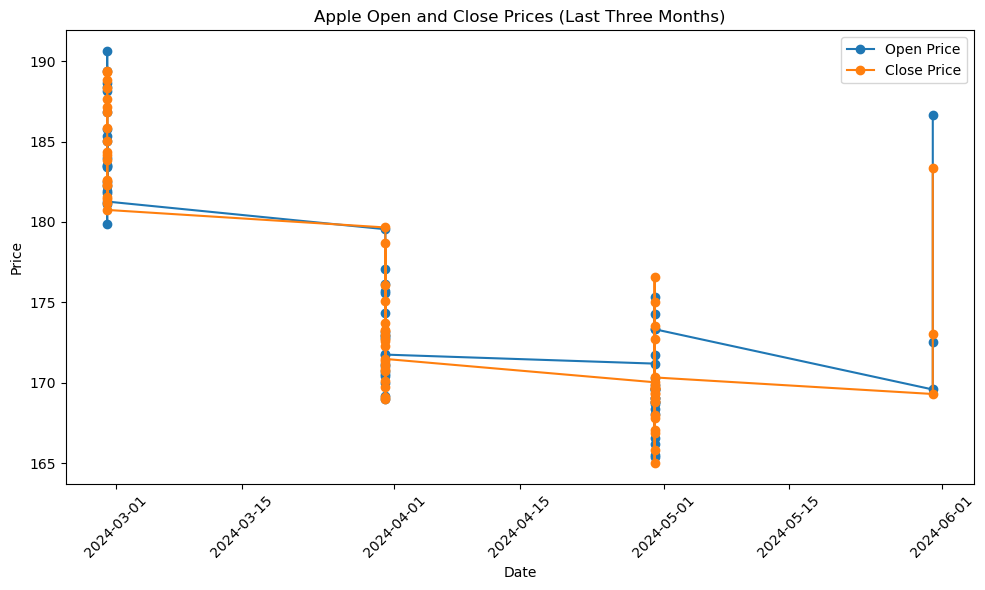

In [41]:
# Convert the 'Date' column to datetime (if not already done)
apple_historical_data_df['Date'] = pd.to_datetime(apple_historical_data_df['Date'], errors='coerce')

# Determine the most recent date and calculate the date three months ago
last_date = apple_historical_data_df['Date'].max()
three_months_ago = last_date - pd.DateOffset(months=3)

# Filter the dataframe to only include data from the last three months
recent_data = apple_historical_data_df[apple_historical_data_df['Date'] >= three_months_ago]

# Plot the Open and Close/Last prices
plt.figure(figsize=(10, 6))
plt.plot(recent_data['Date'], recent_data['Open'], marker='o', label='Open Price')
plt.plot(recent_data['Date'], recent_data['Close/Last'], marker='o', label='Close Price')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Open and Close Prices (Last Three Months)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
max_date = apple_historical_data_df['Date'].max()
print("The maximum date in the timeseries is:", max_date)

The maximum date in the timeseries is: 2024-05-31 00:00:00


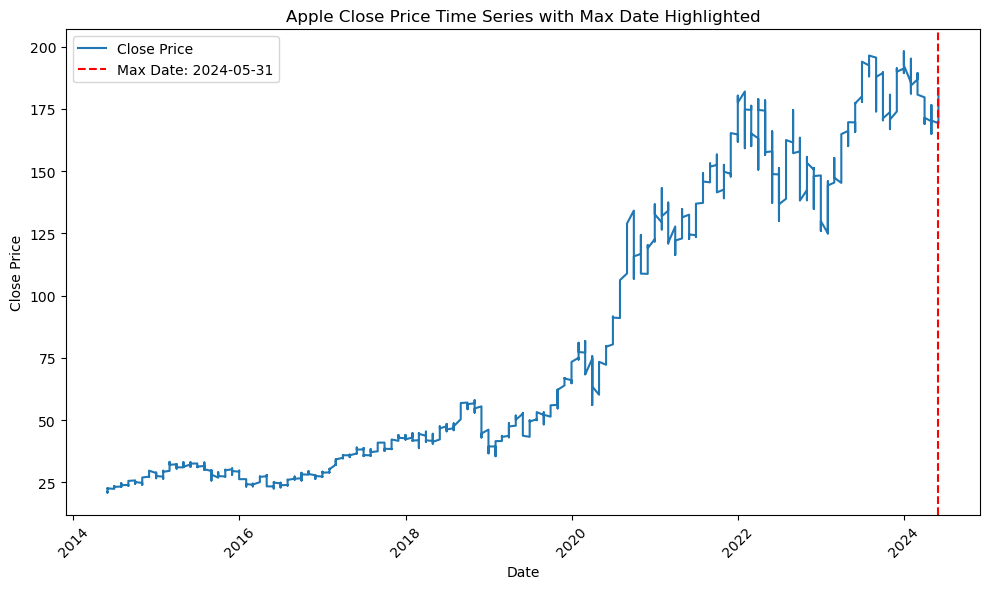

In [43]:
# Ensure that the 'Date' column is in datetime format
apple_historical_data_df['Date'] = pd.to_datetime(apple_historical_data_df['Date'], errors='coerce')

# Get the maximum date from the time series
max_date = apple_historical_data_df['Date'].max()

# Plot the time series (using 'Close/Last' as an example)
plt.figure(figsize=(10, 6))
plt.plot(apple_historical_data_df['Date'], apple_historical_data_df['Close/Last'], label='Close Price')

# Plot a vertical line at the maximum date
plt.axvline(x=max_date, color='red', linestyle='--', label=f'Max Date: {max_date.date()}')

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Apple Close Price Time Series with Max Date Highlighted")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

def get_last_three_months_data(df, date_column):
    """
    Filters the DataFrame to include only the data from the last three months based on the maximum date in the dataset.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing a datetime column.
        date_column (str): The name of the datetime column.
    
    Returns:
        pd.DataFrame: A DataFrame containing only the data from the last three months.
    """
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Get the maximum date in the time series
    max_date = df[date_column].max()
    
    # Calculate the date three months before the maximum date
    start_date = max_date - pd.DateOffset(months=3)
    
    # Filter the DataFrame to include only rows from the last three months
    filtered_df = df[df[date_column] >= start_date]
    
    return filtered_df

# Example usage:
# last_three_months_df = get_last_three_months_data(apple_historical_data_df, "Date")
# print(last_three_months_df.head())

In [45]:
last_three_months_df = get_last_three_months_data(apple_historical_data_df, "Date")

In [46]:
last_three_months_df

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-31,183.38,163224100,186.65,187.00,182.66
1,2024-05-31,173.03,94214920,172.51,173.42,170.89
2,2024-05-31,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-30,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...,...
60,2024-02-29,189.41,53438960,190.64,191.05,188.61
61,2024-02-29,189.30,43490760,186.86,189.31,186.77
62,2024-02-29,187.68,69668820,188.15,189.25,185.84
63,2024-02-29,185.85,102551700,179.86,187.33,179.25


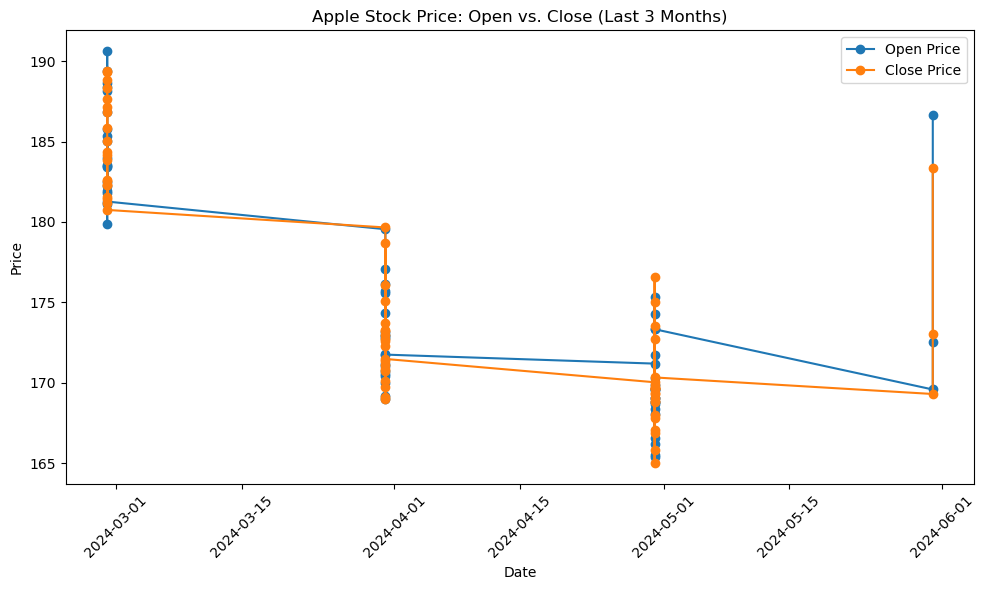

In [47]:
# Plot the Open and Close/Last prices on the same chart
plt.figure(figsize=(10, 6))
plt.plot(last_three_months_df['Date'], last_three_months_df['Open'], marker='o', label='Open Price')
plt.plot(last_three_months_df['Date'], last_three_months_df['Close/Last'], marker='o', label='Close Price')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Stock Price: Open vs. Close (Last 3 Months)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

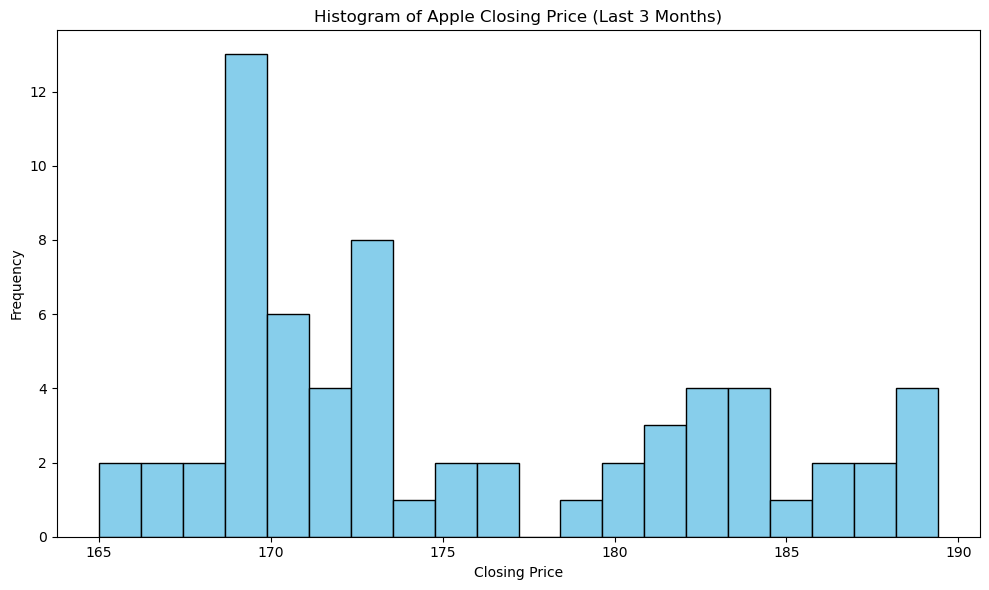

In [48]:
# Plot a histogram of the closing price ('Close/Last') for the last three months
plt.figure(figsize=(10, 6))
plt.hist(last_three_months_df['Close/Last'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Histogram of Apple Closing Price (Last 3 Months)")
plt.tight_layout()
plt.show()

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [49]:
# Calculate daily returns for Apple and Microsoft using percentage change on the closing price

apple_historical_data_df['Apple_return'] = apple_historical_data_df['Close/Last'].pct_change()
microsoft_historical_data_df['MSFT_return'] = microsoft_historical_data_df['Close/Last'].pct_change()
inflation_monthly_df['Inflation_change']  = inflation_monthly_df["CORESTICKM159SFRBATL"].pct_change()



 ### 2. Interpolate stock returns from daily to monthly

In [50]:
# Convert the 'Date' column to datetime (if not already set as index)
if 'Date' in apple_historical_data_df.columns:
    apple_historical_data_df['Date'] = pd.to_datetime(apple_historical_data_df['Date'], errors='coerce')
if 'Date' in microsoft_historical_data_df.columns:
    microsoft_historical_data_df['Date'] = pd.to_datetime(microsoft_historical_data_df['Date'], errors='coerce')

# Set 'Date' as the index (only once)
if not isinstance(apple_historical_data_df.index, pd.DatetimeIndex):
    apple_historical_data_df.set_index('Date', inplace=True)
if not isinstance(microsoft_historical_data_df.index, pd.DatetimeIndex):
    microsoft_historical_data_df.set_index('Date', inplace=True)

# Now resample using a valid frequency alias "M" (month-end)
apple_monthly_returns = apple_historical_data_df['Apple_return'].resample('M').mean()
microsoft_monthly_returns = microsoft_historical_data_df['MSFT_return'].resample('M').mean()

# Check the first few rows
print(apple_monthly_returns.head())
print(microsoft_monthly_returns.head())

Date
2014-05-31   -0.003062
2014-06-30   -0.001894
2014-07-31   -0.001175
2014-08-31   -0.003413
2014-09-30    0.002085
Freq: ME, Name: Apple_return, dtype: float64
Date
2014-05-31   -0.002371
2014-06-30   -0.001205
2014-07-31   -0.001012
2014-08-31   -0.002388
2014-09-30   -0.000798
Freq: ME, Name: MSFT_return, dtype: float64


/var/folders/67/bb922zxs1458y87dr5v_ytz40000gn/T/ipykernel_56529/457145184.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple_monthly_returns = apple_historical_data_df['Apple_return'].resample('M').mean()
/var/folders/67/bb922zxs1458y87dr5v_ytz40000gn/T/ipykernel_56529/457145184.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  microsoft_monthly_returns = microsoft_historical_data_df['MSFT_return'].resample('M').mean()


  ### 3. Merge the dataframes and calculate / plot the correlation 

/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/envs/deeplearning/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


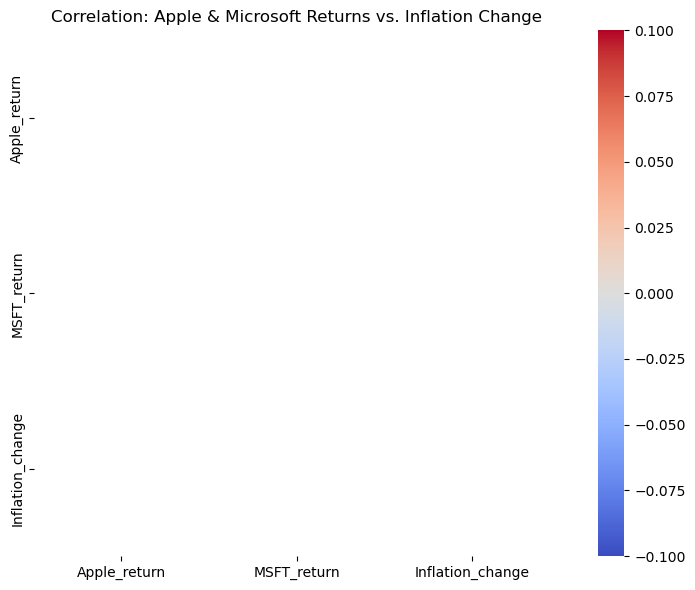

In [60]:
# print("Inflation Data Index:", inflation_monthly_df.index)

# Ensure the index is datetime
if not isinstance(inflation_monthly_df.index, pd.DatetimeIndex):
    inflation_monthly_df.index = pd.to_datetime(inflation_monthly_df.index, errors='coerce')

# Shift the index to month-end (if needed)
inflation_monthly_df.index = inflation_monthly_df.index + pd.offsets.MonthEnd(0)

# Calculate monthly inflation change
inflation_monthly_df['Inflation_change'] = inflation_monthly_df["CORESTICKM159SFRBATL"].pct_change()

# --- Prepare Stock Data (Assuming these have been processed already) ---
# For example, apple_monthly_returns and microsoft_monthly_returns are Series with month-end dates:
apple_monthly_returns = apple_historical_data_df['Apple_return'].resample('ME').mean()
microsoft_monthly_returns = microsoft_historical_data_df['MSFT_return'].resample('ME').mean()

# Rename the series for clarity
apple_series = apple_monthly_returns.rename("Apple_return")
msft_series = microsoft_monthly_returns.rename("MSFT_return")
inflation_series = inflation_monthly_df['Inflation_change'].rename("Inflation_change")

# --- Merge the Data ---
merged_df = pd.concat([apple_series, msft_series, inflation_series], axis=1, join="inner")
merged_df.dropna(inplace=True)
# print("Merged DataFrame (first few rows):")
# print(merged_df.head())

# --- Calculate Correlation Matrix and Plot Heatmap ---
corr_matrix = merged_df.corr()
# print("\nCorrelation Matrix:")
# print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation: Apple & Microsoft Returns vs. Inflation Change")
plt.tight_layout()
plt.show()

In [ ]:
apple_monthly_returns.index.max()

### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

### 5. Plot the correlation matrix as a heatmap 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Merge the DataFrames ---
# Rename the series for clarity if needed
apple_series = apple_monthly_returns.rename("Apple_return")
msft_series = microsoft_monthly_returns.rename("MSFT_return")
inflation_series = inflation_monthly_df['Inflation_change'].rename("Inflation_change")

# Merge the three series on the date index using concat along columns
merged_df = pd.concat([apple_series, msft_series, inflation_series], axis=1)

# Drop any missing values (e.g., from pct_change or interpolation)
merged_df.dropna(inplace=True)

print("Merged DataFrame (first few rows):")
print(merged_df.head())

# --- Calculate the Correlation Matrix ---
corr_matrix = merged_df.corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# --- Plot the Correlation Matrix as a Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix: Apple & Microsoft Returns vs. Inflation Change")
plt.tight_layout()
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

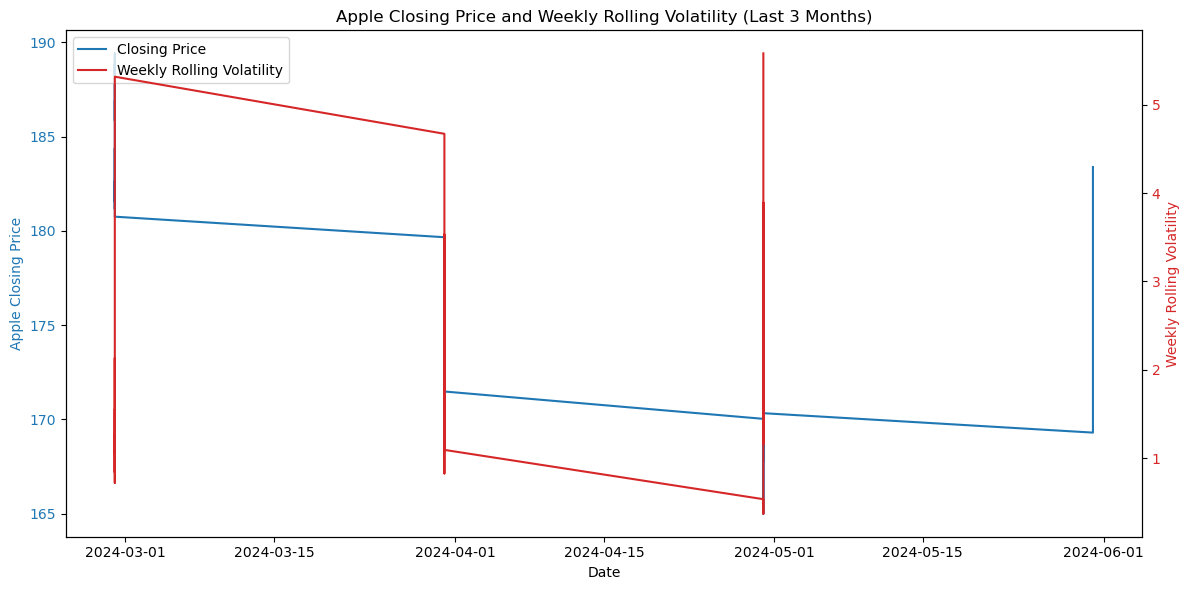

In [62]:
# --- Filter Data to Last 3 Months ---
# Assuming apple_historical_data_df has a DatetimeIndex and a column 'Close/Last'
last_date = apple_historical_data_df.index.max()
start_date = last_date - pd.DateOffset(months=3)
last_three_months_df = apple_historical_data_df[apple_historical_data_df.index >= start_date]

# --- Calculate Weekly Rolling Volatility ---
# Using a window of 5 trading days to approximate one week
weekly_volatility = last_three_months_df["Close/Last"].rolling(window=5).std()

# --- Plot Closing Price and Rolling Volatility on Dual Y-Axes ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the closing price on the primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Apple Closing Price', color=color1)
ax1.plot(last_three_months_df.index, last_three_months_df["Close/Last"], color=color1, label='Closing Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for the rolling volatility
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Weekly Rolling Volatility', color=color2)
ax2.plot(weekly_volatility.index, weekly_volatility, color=color2, label='Weekly Rolling Volatility')
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("Apple Closing Price and Weekly Rolling Volatility (Last 3 Months)")
plt.tight_layout()
plt.show()

In [63]:
# Save Apple preprocessed data
apple_historical_data_df.to_csv("apple_preprocessed.csv", index=True)

# Save Microsoft preprocessed data
microsoft_historical_data_df.to_csv("microsoft_preprocessed.csv", index=True)

# Save Inflation preprocessed data (with calculated inflation change)
inflation_monthly_df.to_csv("inflation_preprocessed.csv", index=True)

# Save the merged dataset (if applicable)
merged_df.to_csv("merged_preprocessed.csv", index=True)

print("Preprocessed datasets have been successfully saved as CSV files.")

Preprocessed datasets have been successfully saved as CSV files.
